# Chapter 03 - Algorithm Analysis

## Reinforcement

### R-3.1
Graph the functions 8n, 4nlog n, 2n2, n3, and 2n using a logarithmic scale
for the x- and y-axes; that is, if the function value f (n) is y, plot this as a
point with x-coordinate at logn and y-coordinate at logy.

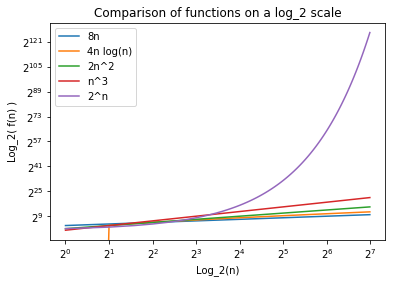

In [61]:
import numpy as np
import matplotlib.pyplot as plt

n = range(1, 128)

plt.figure()
plt.title("Comparison of functions on a log_2 scale")

# Plotting functions
plt.plot(n, [8*i for i in n], label="8n")
plt.plot(n, [4*i*np.log2(i) for i in n], label="4n log(n)")
plt.plot(n, [2*i*i for i in n], label="2n^2")
plt.plot(n, [i*i*i for i in n], label="n^3")
plt.plot(n, [2**i for i in n], label="2^n")

# Setting logarithmic scale of base 2
plt.yscale("log", basey=2)
plt.xscale("log", basex=2)

# Axis labels
plt.xlabel("Log_2(n)")
plt.ylabel("Log_2( f(n) )")

plt.legend()
plt.show()


### R-3.2
The number of operations executed by algorithms A and B is 8nlog n and
2n2, respectively. Determine n_0 such that A is better than B for n ≥ n0.

Finding n_0:

8n log(n) = 2 n^2
 4 log(n) = n
 log(n^4) = n
    n^4 = 2^n
             
It is true when n = 16

### R-3.3
The number of operations executed by algorithms A and B is 40n2 and
2n3, respectively. Determine n0 such that A is better than B for n ≥ n0.

Finding n_0:

40n^2 = 2n^3
   20 = n

-> n0 = 20

### R-3.4
Give an example of a function that is plotted the same on a log-log scale
as it is on a standard scale.

A constant function will look the same on a log and on a normal scale.

### R-3.8
Order the following functions by asymptotic growth rate.
4nlog(n) + 2n, 2^10, 2^log(n)
3n+100log(n), 4n, 2^n
n^2+10n, n^3, nlog(n)

Functions sorted by growth rate:
    2^10
    3n + 100log(n)
    4n
    nlog(n)  
    4nlog(n) + 2n
    n^2 + 10n
    n^3
    2^log(n)
    2^n  

### R-3.23-27
Give a big-Oh characterization, in terms of n, of the running time of the
example(1, 2, 3, 4, 5) function shown in Code Fragment 3.10.
total += S[j] is executed j times, where j = n
                       -> n
                       -> O(n)

In [62]:
def example1(S):
    """Return the sum of the elements in sequence S."""
    n = len(S)
    total = 0
    for j in range(n):  # loop from 0 to n-1
        total += S[j]
    return total


# total += S[j] is executed j times, where j = n/2
#                        -> n/2
#                        -> O(n)
def example2(S):
    """Return the sum of the elements with even index in sequence S."""
    n = len(S)
    total = 0
    for j in range(0, n, 2):  # note the increment of 2
        total += S[j]
    return total


# total += S[j] is executed j * k times, where k = 1 + j
#                        -> j * (1 + j) = j^2 + 1 and j = n
#                        -> n^2 + n
#                        -> O(n^2)
def example3(S):
    """Return the sum of the prefix sums of sequence S."""
    n = len(S)
    total = 0
    for j in range(n):  # loop from 0 to n-1
        for k in range(1 + j):  # loop from 0 to j
            total += S[k]
    return total


# += is executed twice for each j, where j = n
#                          -> 2*n
#                             O(n)
def example4(S):
    """Return the sum of the prefix sums of sequence S."""
    n = len(S)
    prefix = 0
    total = 0
    for j in range(n):
        prefix += S[j]
        total += prefix
    return total


# i is executed n times
# j is executed n times for every i
# k is executed j + 1 times for every j
# B[i] == total is O(n) because it is true at most n times
#
# -> i * (j * (k))
# -> n * (n(n+1)/2 + n)
# -> n * (n(n+3)/2)
# -> n^2 * (n+3)/2
# -> O(n^2)
#
def example5(A, B):  # assume that A and B have equal length
    """Return the number of elements in B equal to the sum of prefix sums in A."""
    n = len(A)
    count = 0
    for i in range(n):  # loop from 0 to n-1
        total = 0
        for j in range(n):  # loop from 0 to n-1
            for k in range(1 + j):  # loop from 0 to j
                total += A[k]
        if B[i] == total:
            count += 1
    return count


### R-3.29
Algorithm A executes an O(log n)-time computation for each entry of an
n-element sequence. What is its worst-case running time?

The worst running time is O(nlog(n))

### R-3.30
Given an n-element sequence S, Algorithm B chooses logn elements in
S at random and executes an O(n)-time calculation for each. What is the
worst-case running time of Algorithm B?

The worst running time is O(nlog(n))

### R-3.31
Given an n-element sequence S of integers, Algorithm C executes an
O(n)-time computation for each even number in S, and an O(logn)-time
computation for each odd number in S. What are the best-case and worstcase
running times of Algorithm C?

Best case: O(log(n)), Worst case: O(n)

### R-3.32
Given an n-element sequence S, Algorithm D calls Algorithm E on each
element S[i]. Algorithm E runs in O(i) time when it is called on element
S[i]. What is the worst-case running time of Algorithm D?

S contains n elements
For every element i in S, E runs at O(i)
The worst case is:
O(1) + O(2) + O(3) + ... + O(n) = O(n(n+1)/2) = O(n^2)

### R-3.33
Al and Bob are arguing about their algorithms. Al claims his O(nlog n)-
time method is always faster than Bob’s O(n2)-time method. To settle the
issue, they perform a set of experiments. To Al’s dismay, they find that if
n < 100, the O(n2)-time algorithm runs faster, and only when n ≥ 100 is
the O(nlog n)-time one better. Explain how this is possible.

It is possible for a O(n^2) to be faster than a O(nlog(n))
We must look at factors in both algorithms

-> n^2 < 16 * n * log(n), for n <= 108

### R-3.34
There is a well-known city (which will go nameless here) whose inhabitants
have the reputation of enjoying a meal only if that meal is the best
they have ever experienced in their life. Otherwise, they hate it. Assuming
meal quality is distributed uniformly across a person’s life, describe
the expected number of times inhabitants of this city are happy with their
meals?

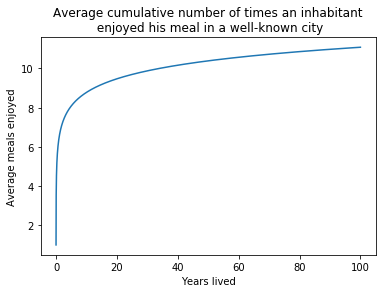

Y is a harmonic number and we know that it is O(log(n))


In [63]:
# Let n be the number of days lived
# People in this city eat only one meal a day
# Therefore, the probability of enjoying a meal is 1/n everyday
#
# The average cumulative number of times an inhabitant enjoyed a meal is the sum of 1/i,
# where i goes from 1 to n

import matplotlib.pyplot as plt

maximum_age = 100       # years
n = maximum_age * 365   # years * days/ years =  years
total_enjoyed_days = 0

xs = []
ys = []

for i in range(1, n+1):
    xs.append(i/365)    # X-axis will be shown in years
    total_enjoyed_days += 1/i
    ys.append(total_enjoyed_days)

plt.plot(xs, ys)
plt.xlabel("Years lived")
plt.ylabel("Average meals enjoyed")
plt.title("Average cumulative number of times an inhabitant\n enjoyed his meal in a well-known city")
plt.show()

print("Y is a harmonic number and we know that it is O(log(n))")


## Reinforcement

### C-3.35
Assuming it is possible to sort n numbers in O(nlog n) time, show that it
is possible to solve the three-way set disjointness problem in O(nlogn)
time.

In [64]:
# This function is O(n log(n))
def disjoint3(A, B, C):
    '''Returns True is there is no element common to all three lists,
       assuming every list has unique elements.'''
    ABC = A + B + C
    ABC = ABC.sort()    # Sorting in O(nlog(n))
    for index in range(len(ABC - 2)):
        if ABC[index] == ABC[index + 1] == ABC[index + 2]:
            return False
    return True

### C-3.36
Describe an efficient algorithm for finding the ten largest elements in a
sequence of size n. What is the running time of your algorithm?

In [65]:
def find_ten_largest(A):
    A = sorted(A)
    return A[-10:]


print(find_ten_largest(range(20)))


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


### C-3.42
Bob built a Web site and gave the URL only to his n friends, which he
numbered from 1 to n. He told friend number i that he/she can visit the
Web site at most i times. Now Bob has a counter, C, keeping track of the
total number of visits to the site (but not the identities of who visits). What
is the minimum value for C such that Bob can know that one of his friends
has visited his/her maximum allowed number of times?

If every friend can visit i-1 times the website before Bob can know
Therefore, the number is n(n+1)/2 - n = (n^2)/2 + 1.

### C-3.45
A sequence S contains n−1 unique integers in the range [0,n−1], that
is, there is one number from this range that is not in S. Design an O(n)-
time algorithm for finding that number. You are only allowed to use O(1)
additional space besides the sequence S itself.

In [66]:
def find_missing_integer(sequence):
    """Returns the first missing integer from a sequence"""
    for index in range(len(sequence) - 1 ):
        diff = sequence[index + 1] - sequence[index]
        if diff != 1:
            return sequence[index] + 1
    return "No missing integer"


# Integer 2 is missing from the sequence
sequence_1= [0, 1, 3, 4]
print(find_missing_integer(sequence_1))

# Complete sequence
sequence_2= [0, 1, 2, 3]
print(find_missing_integer(sequence_2))

2
No missing integer


### C-3.54
A sequence S contains n integers taken from the interval [0,4n], with repetitions
allowed. Describe an efficient algorithm for determining an integer
value k that occurs the most often in S. What is the running time of your
algorithm?

In [67]:
def get_most_repetitive(sequence):
    """Finds the most frequent integer in a sequence
       Returns the integer and it's count"""
    sequence = sorted(sequence)
    current_max = [sequence[0]]
    possible_max = []
    for index in range(1, len(sequence)):
        if sequence[index] == current_max[0]:
            current_max.append(sequence[index])
        elif len(possible_max) == 0 or sequence[index] == possible_max[0]:
            possible_max.append(sequence[index])
            if len(possible_max) > len(current_max):
                current_max = possible_max
        else:
            possible_max = [sequence[index]]
    return current_max[0], len(current_max)


my_sequence = [0, 0, 1, 2, 3, 3, 3, 4, 4, 6, 6, 6, 6]
integer, occurence = get_most_repetitive(my_sequence)
print("The most frequent integer is {}, it is written {} times.".format(integer, occurence))

The most frequent integer is 6, it is written 4 times.


### R-3.56
Perform an experimental analysis that compares the relative running times
of the functions shown in Code Fragment 3.10.

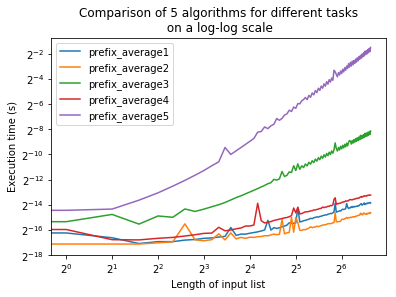

In [68]:
# functions to test. It used to be on a separate folder, but this is cumbersome to do in a notebook
# I left it in a separate folder in the Source_Code section
functions ="""
def example1(S):
  n = len(S)
  total = 0
  for j in range(n):             # loop from 0 to n-1
    total += S[j]
  return total

def example2(S):
  n = len(S)
  total = 0
  for j in range(0, n, 2):       # note the increment of 2
    total += S[j]
  return total
  
def example3(S):
  n = len(S)
  total = 0
  for j in range(n):            # loop from 0 to n-1
    for k in range(1+j):        # loop from 0 to j
      total += S[k]
  return total

def example4(S):
  n = len(S)
  prefix = 0
  total = 0
  for j in range(n):
    prefix += S[j]
    total += prefix
  return total

def example5(A, B):           # assume that A and B have equal length
  n = len(A)                  
  count = 0
  for i in range(n):          # loop from 0 to n-1
    total = 0
    for j in range(n):        # loop from 0 to n-1
      for k in range(1+j):    # loop from 0 to j
        total += A[k]
    if B[i] == total:
      count += 1
  return count
  
"""


#Perform an experimental analysis that compares the relative running times
# of the functions shown in Code Fragment 3.10.

import matplotlib.pyplot as plt
import timeit

# average execution times for every length of input list (Y axis data)
func_1_avg_times = []
func_2_avg_times = []
func_3_avg_times = []
func_4_avg_times = []
func_5_avg_times = []

# list of integer to use as functions input (X axis data)
int_lst = []

# group average times to loop over them
avg_times_lst = [func_1_avg_times,
                 func_2_avg_times,
                 func_3_avg_times,
                 func_4_avg_times,
                 func_5_avg_times]

# measures the execution time of every algorithm for a given list length
for new_int in range(0, 100, 1):
  int_lst.append(new_int)    # generating an increasingly long list of int to swipe x-axis

  for func_index, func_avg_times in enumerate(avg_times_lst, start=1):
    if func_index != 5:
      time = timeit.timeit("""total = example{}({})""".format(func_index, int_lst),
                          setup=functions,
                          number=10)
    else:
      time = timeit.timeit("""total = example{}({}, {})""".format(func_index, int_lst, int_lst),
                             setup=functions,
                             number=10)

    func_avg_times.append(time)    # add execution time of its respective algorithm to the list of execution times

# plot every result
for avg_index, avg_times in enumerate(avg_times_lst, start=1):
  plt.plot(int_lst, avg_times, label="prefix_average{}".format(avg_index))

plt.xlabel("Length of input list")
plt.ylabel("Execution time (s)")
plt.title("Comparison of {} algorithms for different tasks\n on a log-log scale".format(len(avg_times_lst)))
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.legend()

plt.show()



### R-3.55
Perform an experimental analysis of the three algorithms prefix average1,
prefix average2, and prefix average3, from Section 3.3.3. Visualize their
running times as a function of the input size with a log-log chart

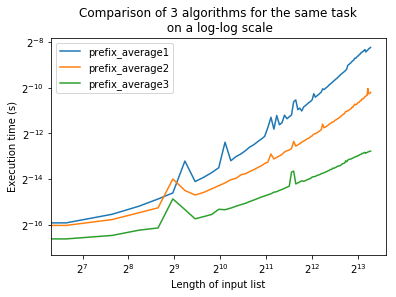

In [69]:
# functions to test. It used to be on a separate folder, but this is cumbersome to do in a notebook
# I left it in a separate folder in the Source_Code section
functions ="""
def prefix_average1(S):
    n = len(S)
    A = [0] * n                     # create new list of n zeros
    for j in range(n):
        total = 0                     # begin computing S[0] + ... + S[j]
        for i in range(j + 1):
            total += S[i]
        A[j] = total / (j+1)          # record the average
    return A
    
def prefix_average2(S):
    n = len(S)
    A = [0] * n                     # create new list of n zeros
    for j in range(n):
        A[j] = sum(S[0:j+1]) / (j+1)  # record the average
    return A
    
def prefix_average3(S):
    n = len(S)
    A = [0] * n                   # create new list of n zeros
    total = 0                     # compute prefix sum as S[0] + S[1] + ...
    for j in range(n):
        total += S[j]               # update prefix sum to include S[j]
        A[j] = total / (j+1)        # compute average based on current sum
    return A 
"""


import matplotlib.pyplot as plt
import timeit


# average execution times for every length of input list (Y axis data)
func_1_avg_times = []
func_2_avg_times = []
func_3_avg_times = []

# list of integer to use as functions input (X axis data)
int_lst = []

# group average times to loop over them
avg_times_lst = [func_1_avg_times,
                 func_2_avg_times,
                 func_3_avg_times]

# measures the execution time of every algorithm for a given list length
for new_int in range(0, 10000, 100):
    int_lst.append(new_int)    # generating an increasingly long list of int to swipe x-axis

    for func_index, func_avg_times in enumerate(avg_times_lst, start=1):
        time = timeit.timeit("""total = prefix_average{}({})""".format(func_index, int_lst),
                        setup=functions,
                        number=10)
        func_avg_times.append(time)    # add execution time of its respective algorithm to the list of execution times

# plot every result
for avg_index, avg_times in enumerate(avg_times_lst, start=1):
    plt.plot(int_lst, avg_times, label="prefix_average{}".format(avg_index))

plt.xlabel("Length of input list")
plt.ylabel("Execution time (s)")
plt.title("Comparison of {} algorithms for the same task\n on a log-log scale".format(len(avg_times_lst)))
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.legend()

plt.show()


### R-3.57
Perform experimental analysis to test the hypothesis that Python’s sorted
method runs in O(nlog n) time on average.

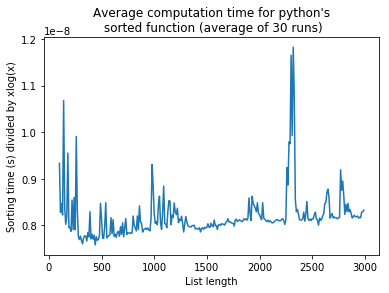

In [71]:
# It takes about a minute to compute with original inputs
# Graphic shows about a constant function with y data divided by xlog(x)

import matplotlib.pyplot as plt
import numpy as np
import timeit
import random

xs = []                 # x axis values (number of integers : n)
avg_sorting_times = []   # y axis values (time required to sort n integers)

# measuring average sorting times
for new_int in range(100, 3000, 10):
    # statement to measure
    stmt = """
lst = sorted(lst)
"""
    # generating and shuffling the list, it is not included in measured time
    setup = """import random
lst = list(range({}))
random.shuffle(lst)""".format(new_int)

    t = timeit.Timer(stmt, setup)

    # repeat multiple times for every list length to obtain average times
    number = 30
    total_time = sum(t.repeat(number, 1)) # execute once per repeat to measure only the sorting time
    avg_time = total_time / number

    # Append x and y values
    xs.append(new_int)
    avg_sorting_times.append(avg_time/(new_int * np.log2(new_int))) #

plt.plot(xs, avg_sorting_times, label="sorted()")
plt.xlabel("List length")
plt.ylabel("Sorting time (s) divided by xlog(x)")
plt.title("Average computation time for python's\n sorted function (average of 30 runs)")

plt.show()